In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('synthetic_water_disease_dataset_balanced.csv')
df.head()

,SampleID,State,District,VillageID,VillageName,WeekStartDate,Month,Rainfall_mm,AvgTemperature_C,WaterSourceType,...,Vomiting,AbdominalPain,Jaundice,SymptomCount,CholeraCases,TyphoidCases,TotalCasesReported,HouseholdsAffected,RiskScore,OutbreakStatus
0,1,Meghalaya,East Khasi Hills,ME859,Village_141,2025-07-20,July,324.8,26.6,OpenWell,...,False,False,True,2,4,3,7,7,0.90,High_Risk
1,2,Meghalaya,East Khasi Hills,ME859,Village_141,2025-06-15,June,138.3,25.3,OpenWell,...,False,False,False,0,4,3,7,8,0.80,High_Risk
2,3,Meghalaya,East Khasi Hills,ME859,Village_141,2025-09-07,September,190.8,22.4,RainwaterHarvest,...,False,False,False,0,5,2,7,6,1.00,High_Risk
3,4,Meghalaya,East Khasi Hills,ME859,Village_141,2025-07-13,July,193.0,26.9,River,...,False,False,True,2,1,3,4,8,1.00,High_Risk
4,5,Meghalaya,East Khasi Hills,ME859,Village_141,2025-09-07,September,120.0,26.1,RainwaterHarvest,...,False,False,False,1,5,0,5,3,0.65,Medium_Risk


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 27 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   SampleID            5000 non-null   int64  
 1   State               5000 non-null   object 
 2   District            5000 non-null   object 
 3   VillageID           5000 non-null   object 
 4   VillageName         5000 non-null   object 
 5   WeekStartDate       5000 non-null   object 
 6   Month               5000 non-null   object 
 7   Rainfall_mm         5000 non-null   float64
 8   AvgTemperature_C    5000 non-null   float64
 9   WaterSourceType     5000 non-null   object 
 10  Water_pH            5000 non-null   float64
 11  Turbidity_NTU       5000 non-null   float64
 12  Chlorine_mg_L       5000 non-null   float64
 13  BacterialPresence   5000 non-null   bool   
 14  EColi_MPN           5000 non-null   int64  
 15  Fever               5000 non-null   bool   
 16  Diarrh

In [4]:
df.describe()

,SampleID,Rainfall_mm,AvgTemperature_C,Water_pH,Turbidity_NTU,Chlorine_mg_L,EColi_MPN,SymptomCount,CholeraCases,TyphoidCases,TotalCasesReported,HouseholdsAffected,RiskScore
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000
mean,2500.500000,214.717420,27.056720,7.000024,5.419280,0.508312,90.234400,0.655200,1.553800,1.554600,3.108400,3.041000,0.51492
std,1443.520003,90.007151,2.978753,0.501166,2.653353,0.288019,89.404027,0.739474,1.636594,1.624914,2.712733,2.667647,0.37042
min,1.000000,-7.700000,16.200000,5.150000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,1250.750000,142.500000,25.000000,6.650000,3.400000,0.300000,21.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.20000
50%,2500.500000,203.900000,27.000000,6.990000,5.500000,0.500000,43.000000,1.000000,1.000000,1.000000,2.000000,2.000000,0.50000
75%,3750.250000,289.125000,29.100000,7.340000,7.400000,0.700000,158.000000,1.000000,3.000000,3.000000,5.000000,5.000000,0.90000
max,5000.000000,458.100000,37.800000,9.070000,13.800000,1.540000,299.000000,4.000000,5.000000,5.000000,10.000000,9.000000,1.00000


In [5]:
df.isnull().sum()

SampleID              0
State                 0
District              0
VillageID             0
VillageName           0
WeekStartDate         0
Month                 0
Rainfall_mm           0
AvgTemperature_C      0
WaterSourceType       0
Water_pH              0
Turbidity_NTU         0
Chlorine_mg_L         0
BacterialPresence     0
EColi_MPN             0
Fever                 0
Diarrhea              0
Vomiting              0
AbdominalPain         0
Jaundice              0
SymptomCount          0
CholeraCases          0
TyphoidCases          0
TotalCasesReported    0
HouseholdsAffected    0
RiskScore             0
OutbreakStatus        0
dtype: int64

In [6]:
columns_to_drop = [
    'SampleID', 'State', 'District', 'VillageID',
    'VillageName', 'WeekStartDate',
    'RiskScore', 'TotalCasesReported', 'HouseholdsAffected',
    'CholeraCases', 'TyphoidCases', 'SymptomCount',
    'Fever', 'Diarrhea', 'Vomiting', 'AbdominalPain', 'Jaundice'
]
df.drop(columns_to_drop, axis=1, inplace=True)
df.head()

,Month,Rainfall_mm,AvgTemperature_C,WaterSourceType,Water_pH,Turbidity_NTU,Chlorine_mg_L,BacterialPresence,EColi_MPN,OutbreakStatus
0,July,324.8,26.6,OpenWell,7.32,10.0,0.43,True,87,High_Risk
1,June,138.3,25.3,OpenWell,6.74,5.9,0.22,True,21,High_Risk
2,September,190.8,22.4,RainwaterHarvest,6.79,5.5,0.29,True,174,High_Risk
3,July,193.0,26.9,River,7.18,7.8,0.75,True,166,High_Risk
4,September,120.0,26.1,RainwaterHarvest,6.70,10.7,0.50,True,34,Medium_Risk


In [7]:
from sklearn.preprocessing import LabelEncoder

In [8]:
le = LabelEncoder()
df['OutbreakStatus'] = le.fit_transform(df['OutbreakStatus'])
df['OutbreakStatus'].value_counts()

OutbreakStatus
1    2330
0    2143
2     527
Name: count, dtype: int64

In [9]:
###handling boolean columns - convert to int
bool_cols = ['BacterialPresence']
for col in bool_cols:
    df[col] = df[col].astype(int)

df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Month              5000 non-null   object 
 1   Rainfall_mm        5000 non-null   float64
 2   AvgTemperature_C   5000 non-null   float64
 3   WaterSourceType    5000 non-null   object 
 4   Water_pH           5000 non-null   float64
 5   Turbidity_NTU      5000 non-null   float64
 6   Chlorine_mg_L      5000 non-null   float64
 7   BacterialPresence  5000 non-null   int64  
 8   EColi_MPN          5000 non-null   int64  
 9   OutbreakStatus     5000 non-null   int64  
dtypes: float64(5), int64(3), object(2)
memory usage: 390.8+ KB


In [10]:

X = df.drop('OutbreakStatus', axis=1)
y = df['OutbreakStatus']
categorical_features = ['Month', 'WaterSourceType']

In [11]:
###month and water source type needs to be encoded since they have many values so use ColumnTransformer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first'), categorical_features)
    ],
    remainder='passthrough' # Keep all other columns untouched
)

X_processed = preprocessor.fit_transform(X)


In [12]:
raw_feature_names = preprocessor.get_feature_names_out()
cleaned_feature_names = [name.split('__')[-1] for name in raw_feature_names]
df_processed = pd.DataFrame(X_processed, columns=cleaned_feature_names)


In [13]:
df_processed['OutbreakStatus'] = y.reset_index(drop=True)


Generating analysis plots...


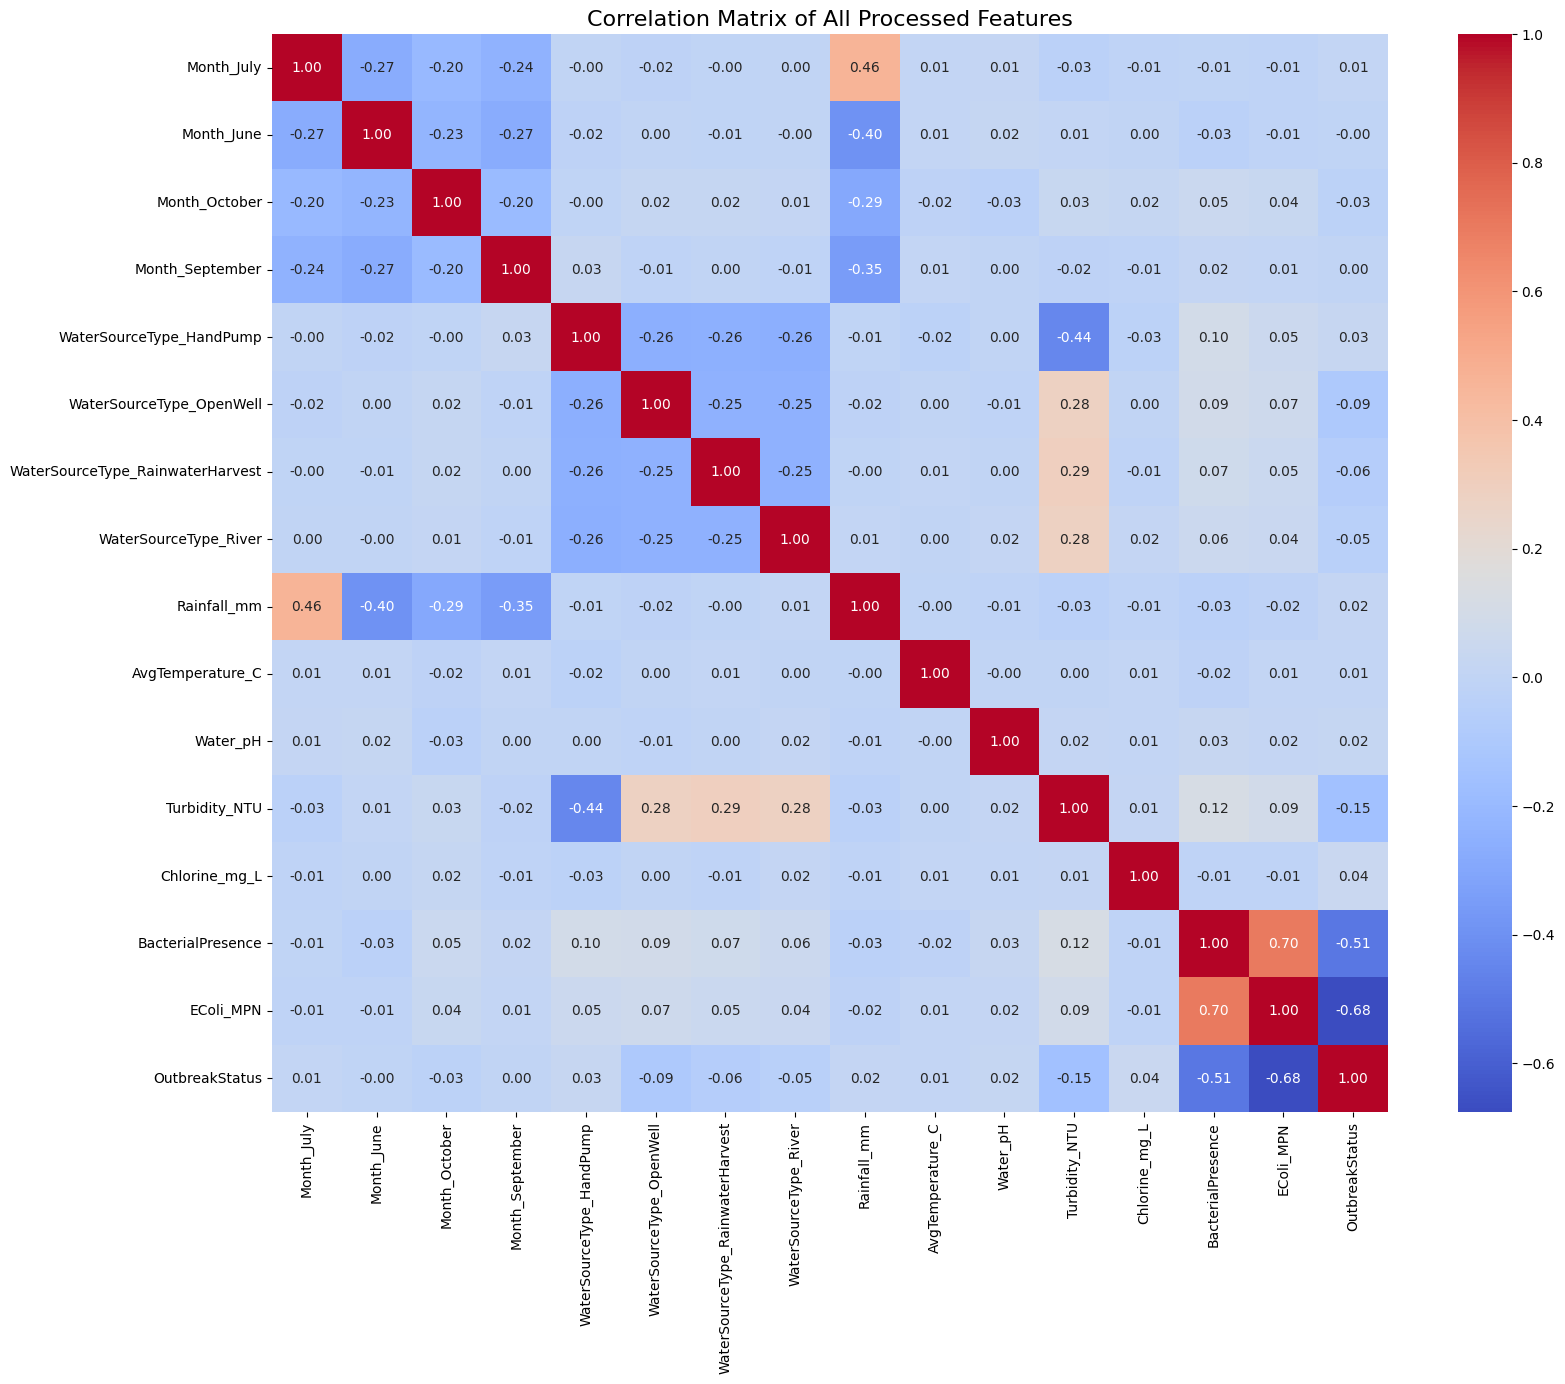

In [14]:
print("Generating analysis plots...")
# Correlation Heatmap
plt.figure(figsize=(18, 14))
sns.heatmap(df_processed.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of All Processed Features', fontsize=16)
plt.show()

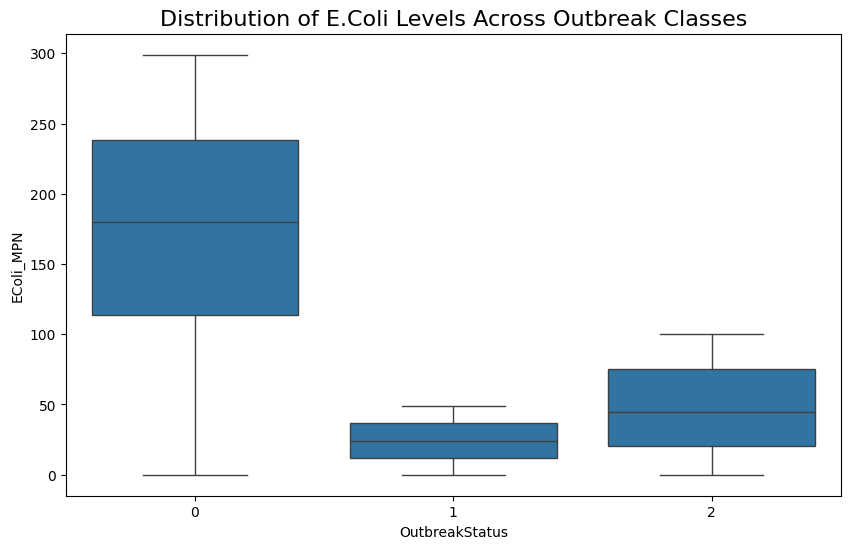

In [16]:
# Boxplot for a key PREDICTOR feature
plt.figure(figsize=(10, 6))

# Replace 'RiskScore' with a feature that still exists, like 'EColi_MPN'
sns.boxplot(x='OutbreakStatus', y='EColi_MPN', data=df_processed)

plt.title('Distribution of E.Coli Levels Across Outbreak Classes', fontsize=16)
plt.show()

In [17]:
print("Saving the processed data to 'processed_water_disease_data.csv'...")
df_processed.to_csv('processed_water_disease_data.csv', index=False)

print("\n✅ EDA and Preprocessing Complete! Cleaned file is ready.")

Saving the processed data to 'processed_water_disease_data.csv'...

✅ EDA and Preprocessing Complete! Cleaned file is ready.


In [18]:
import joblib
joblib.dump(preprocessor, 'data_preprocessor.joblib')

['data_preprocessor.joblib']